In [1]:
import fenics as fn
import numpy as np
import matplotlib.pyplot as plt

### Import the mesh and define function space

In [2]:
mesh = fn.Mesh('geo.xml')
markers = fn.MeshFunction("size_t", mesh, 'geo_physical_region.xml')
boundaries = fn.MeshFunction('size_t', mesh, 'geo_facet_region.xml')
dx = fn.Measure('dx', domain=mesh, subdomain_data=markers)
V = fn.FunctionSpace(mesh, 'CG', 2)

### Boundary Conditions

In [3]:
inner_boundary = fn.DirichletBC(V, fn.Constant(10.0), boundaries, 1)
outer_boundary = fn.DirichletBC(V, fn.Constant(1), boundaries, 2)
bcs =[inner_boundary, outer_boundary]

### Solve the Laplace Equation 

In [4]:
u = fn.TrialFunction(V)
v = fn.TestFunction(V)
a = fn.dot(fn.grad(u), fn.grad(v)) * fn.dx
L = fn.Constant('0') * v * fn.dx
u = fn.Function(V)
fn.solve(a == L, u, bcs)

### Find the electric field from the electric potential 

In [5]:
electric_field = fn.project(-fn.grad(u))

### Save Results

In [6]:
potentialFile = fn.File('output/potential.pvd')
potentialFile << u

vtkfile = fn.File('output/e_field.pvd')
vtkfile << fn.project(electric_field)

# Comparison with Analytical Solution

In [7]:
def analytical_answer(phi_i, r_i, phi_o, r_o, r):
    return (phi_i*r_i - phi_o*r_o)/(r_i-r_o) - r_i*r_o*(phi_i - phi_o)/(r_i-r_o)/r

def analytical_e(phi_i, r_i, phi_o, r_o, r):
    return -r_i * r_o * (phi_i - phi_o)/(r_i-r_o)/r**2

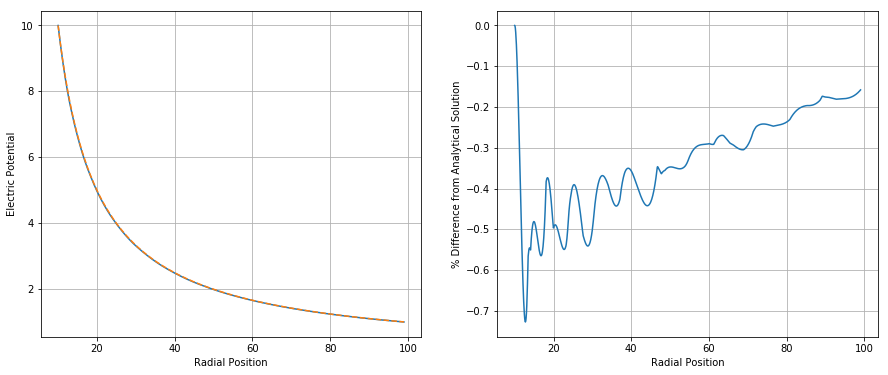

In [8]:
x = np.linspace(10, 99, 1000)
y = np.zeros(len(x))
z = np.zeros(len(x))
coords = np.dstack((x, y, z))[0]

u_line = np.array(list(map(u, coords)))
ana = analytical_answer(10, 10, 1, 100, x)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(x, u_line)
ax[0].plot(x, ana, '--')
ax[0].set_xlabel("Radial Position")
ax[0].set_ylabel("Electric Potential")
ax[0].grid()

ax[1].plot(x, 100*(u_line-ana)/ana)
ax[1].set_xlabel("Radial Position")
ax[1].set_ylabel("% Difference from Analytical Solution")
ax[1].grid()
plt.show()

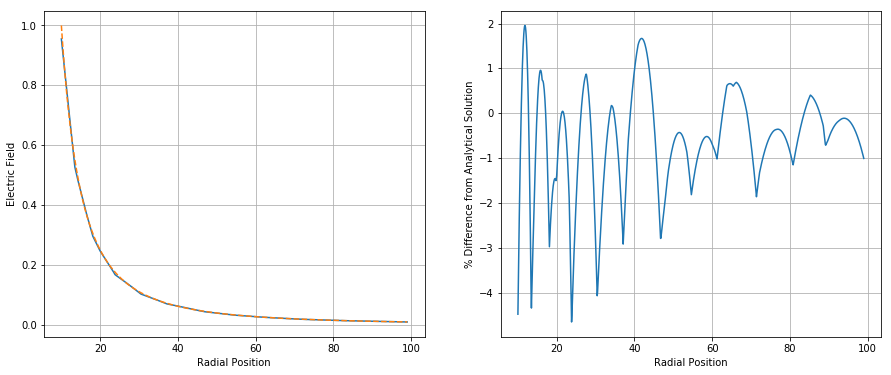

In [9]:
x = np.linspace(10, 99, 1000)
y = np.zeros(len(x))
z = np.zeros(len(x))
coords = np.dstack((x, y, z))[0]

e_line = np.array(list(map(electric_field, coords)))[:, 0]
ana_e = analytical_e(10, 10, 1, 100, x)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(x, e_line)
ax[0].plot(x, ana_e, '--')
ax[0].set_xlabel("Radial Position")
ax[0].set_ylabel("Electric Field")
ax[0].grid()

ax[1].plot(x, 100*(e_line-ana_e)/ana_e)
ax[1].set_xlabel("Radial Position")
ax[1].set_ylabel("% Difference from Analytical Solution")
ax[1].grid()
plt.show()

In [10]:
potentialFile = fn.File('output/potential.pvd')
potentialFile << u
e_fieldfile = fn.File('output/e_field.pvd')
e_fieldfile << electric_field